In [10]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [19]:
# setup

data_path = '../dataset/train/train.csv'  # set data path
n_split = 5                               # set split 
random_state = 2023                       # set random seed

In [20]:
df = pd.read_csv(data_path)

In [21]:
skf = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=random_state)

In [48]:
df_skf = skf.split(df, df.label)

In [62]:
for i, (train_index, valid_index) in enumerate(skf.split(df, df.label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Valid: index={valid_index}")
    print(f"  len(Train): {len(train_index)}")
    print(f"  len(Valid): {len(valid_index)}")
    #print(df.iloc[train_index].head(3))
    
    df.iloc[train_index].to_csv(f'skf_train_{i}.csv')
    df.iloc[valid_index].to_csv(f'skf_dev_{i}.csv')

Fold 0:
  Train: index=[    0     1     2 ... 32467 32468 32469]
  Valid: index=[   11    27    36 ... 32445 32448 32452]
  len(Train): 25976
  len(Valid): 6494
Fold 1:
  Train: index=[    1     2     3 ... 32467 32468 32469]
  Valid: index=[    0     5     7 ... 32456 32460 32463]
  len(Train): 25976
  len(Valid): 6494
Fold 2:
  Train: index=[    0     1     2 ... 32466 32467 32469]
  Valid: index=[    6     9    12 ... 32462 32464 32468]
  len(Train): 25976
  len(Valid): 6494
Fold 3:
  Train: index=[    0     1     3 ... 32464 32467 32468]
  Valid: index=[    2     8    18 ... 32465 32466 32469]
  len(Train): 25976
  len(Valid): 6494
Fold 4:
  Train: index=[    0     2     5 ... 32466 32468 32469]
  Valid: index=[    1     3     4 ... 32453 32461 32467]
  len(Train): 25976
  len(Valid): 6494


In [65]:
# check stratify

import matplotlib.pyplot as plt

In [66]:
check = pd.read_csv('./skf_train_0.csv')

In [67]:
check_labels = check.label.value_counts()

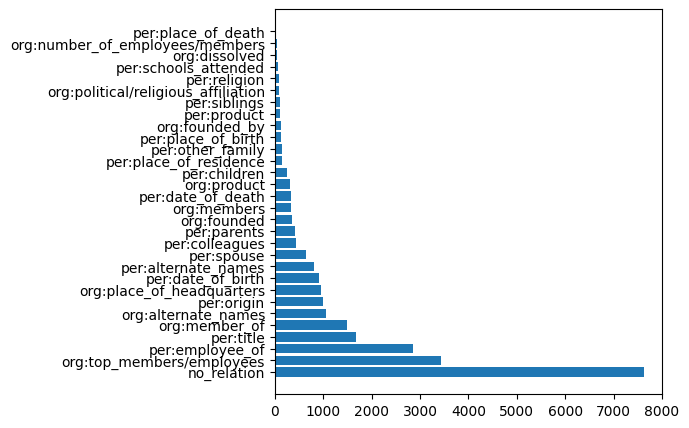

In [69]:
plt.figure(figsize=(5, 5))
plt.barh(check_labels.index, check_labels)
plt.show()